# Rule Based Analysis

In [5]:
import os
import sys
from pathlib import Path
import pandas as pd

# use Path(os.getcwd()) outside the vscode to get the root folder

# Root Folder - use hardcode in vscode jupyter notebook, due to kernel inconsistency
ROOT_DIR = "d:/Desktop/Data Science Learning/DS Self Projects/IITG Capstone/Stock Market Anomaly Detection/stock-anomaly-detector/"
project_root = ROOT_DIR

# selecing the root as working directory
os.chdir(project_root)


# Adding the project root to sys.path
if project_root not in sys.path:
    sys.path.append(project_root) 

In [7]:
# loading features 
df = pd.read_csv("data/processed/features.csv", parse_dates=["date"])

df.head()

,date,ticker,ret,ret_z,vol_z,range_pct
0,1999-03-10,QQQ,NaN,NaN,NaN,NaN
1,1999-03-11,QQQ,0.004896,NaN,NaN,NaN
2,1999-03-12,QQQ,-0.024361,NaN,NaN,NaN
3,1999-03-15,QQQ,0.028714,NaN,NaN,NaN
4,1999-03-16,QQQ,0.008495,NaN,NaN,NaN


In [8]:
# load already persisted rule based anomaly

df_rule = pd.read_csv(
    "data/processed/anomalies_rule_test.csv",
    parse_dates=["date"]
)
df_rule.head()

,date,ticker,anomaly_flag,type,ret,ret_z,vol_z,range_pct,why
0,2020-01-06,NaN,1,NaN,0.006443,0.623673,0.319200,0.984127,range_pct > 0.95
1,2020-01-24,NaN,1,NaN,-0.008415,-1.958409,1.901769,1.000000,range_pct > 0.95
2,2020-01-27,NaN,1,crash,-0.020656,-3.994795,2.072816,0.809524,|ret_z| > 2.5
3,2020-01-31,NaN,1,crash+ volume_shock,-0.015858,-2.815644,3.118565,1.000000,|ret_z| > 2.5; vol_z > 2.5; range_pct > 0.95
4,2020-02-04,NaN,1,spike,0.022889,3.008675,0.543106,0.936508,|ret_z| > 2.5


In [9]:
# count of all sorts of type of anomalies in rule based 
df_rule["type"].value_counts()


type
crash                  36
spike                  28
crash+ volume_shock    11
volume_shock            6
spike+ volume_shock     6
Name: count, dtype: int64

## Rule Based Anomalies Plot

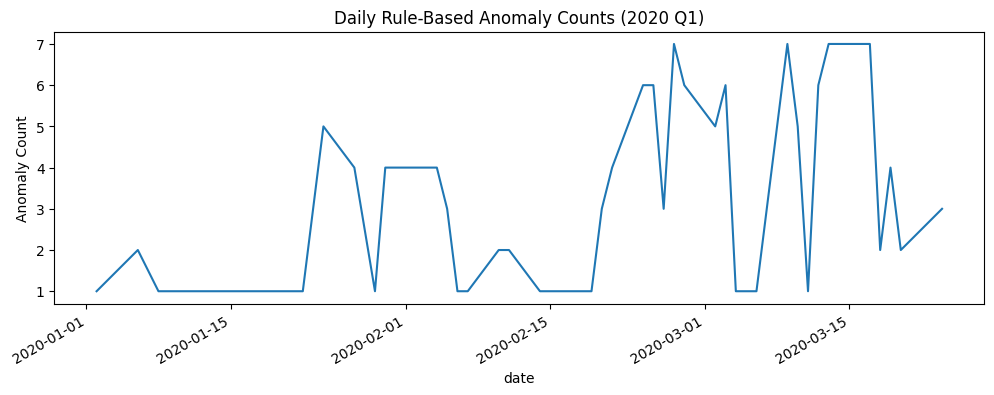

In [10]:
import matplotlib.pyplot as plt 

daily_counts = df_rule.groupby("date").size()

daily_counts.plot(
    figsize=(12, 4),
    title="Daily Rule-Based Anomaly Counts (2020 Q1)"
)
plt.ylabel("Anomaly Count")
plt.show()


**Rule-Based Detector Summary**

The rule-based detector is highly sensitive and flags a large number of anomalies during both calm and stressed periods. While it is effective at capturing extreme movements, it lacks adaptivity to changing market regimes and produces a high false-positive rate. This motivates the use of unsupervised learning methods to learn normal behavior from data.